-0.0005525758703116496 0.006118295939544346 0.055
Capital Market point is (0.0061,-0.0006)
Market Portfolio: [-1.61745216e-02  1.47873274e-01  1.48317104e-02  3.93478396e-02
  8.41069935e-03 -2.74477594e-05  2.59847994e-03 -1.36911503e-02
 -1.34229463e-02  7.83780025e-02  1.90826537e-02 -4.22725540e-03
  1.84318459e-02 -2.84085044e-04 -1.27346871e-02  3.17439784e-03
  1.30466346e-03 -2.90256250e-03 -1.79481000e+02 -2.14121363e-04
  2.02279443e-03 -4.47826481e-03  7.03839974e-02  1.20896384e-02
  8.11432453e-03  4.31567745e-03  1.45440147e-02  1.45554999e-02
 -1.07262051e-02  2.98155793e-02  6.05611550e-03 -6.37641159e-03
  2.71377147e-02 -2.11586580e-03  1.74297488e-02  1.66424170e-02
  5.90002612e-02  1.79470861e+02  3.95290464e-05  3.23915401e-02
  6.23079439e-03  7.27868178e-03 -2.36065229e-02 -5.74675616e-04
  4.99158243e-02  2.63353616e-03 -3.05733375e-03  1.02707318e-02
  3.54173462e-03  1.46667021e-01  2.50242230e-01]
Beta of each Asset: [0.04231928 0.01522395 0.05057771 0.02215

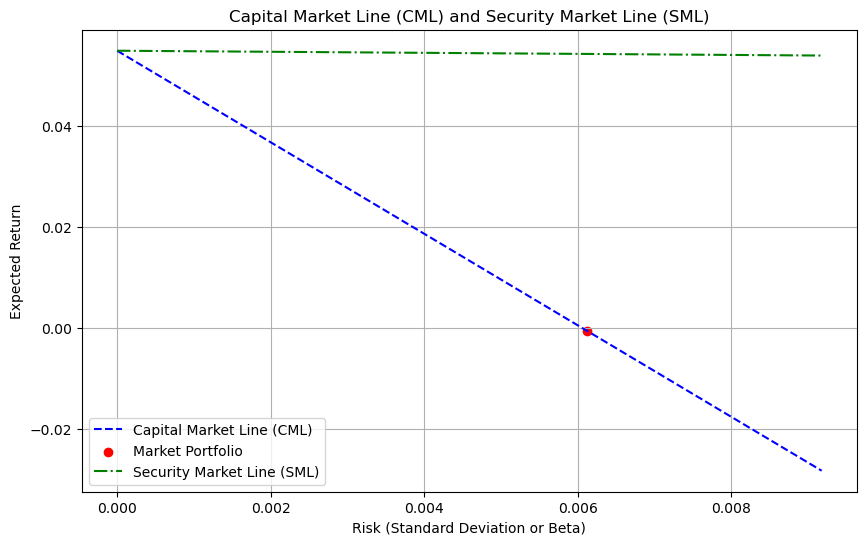

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Set fixed rate of return
mu_f = 0.055

# Read the data
df = pd.read_csv('RATES_ASSETS.csv')

# Fill NaN values with the mean of each column
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)
col_arr = {}
arr_list = []
mu = []

# Convert data to numpy arrays and calculate mean returns
for i in range(len(df.columns)):
    col_name = df.columns[i]
    col_arr[i + 1] = df[col_name].to_numpy()
    mu.append(np.mean(col_arr[i + 1]))
    arr_list.append(col_arr[i + 1])

mu = np.array(mu)
data_matrix = np.array(arr_list)

# Calculate the covariance matrix and its inverse
cov_mat = np.cov(data_matrix)
cov_mat_inv = np.linalg.inv(cov_mat)
n = len(df.columns)
e = np.ones((n))
mu_mu_f = mu - mu_f * (e)

# Compute weights for the market portfolio
w_m = np.dot(cov_mat_inv, mu_mu_f) / (np.dot(e.T, np.dot(cov_mat_inv, mu_mu_f)))
mu_m = np.dot(mu.T, w_m)
sigma_m = math.sqrt(np.dot(w_m.T, np.dot(cov_mat, w_m)))

# Compute the weights for the minimum variance portfolio
u = -2 / (np.dot(np.dot(e.T, cov_mat_inv), e))
w = -0.5 * u * (np.dot(np.linalg.inv(cov_mat), e))
sigma_p = math.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
w_r = sigma_m / sigma_p
w_m_or = w_r * w_m
arr_list_m = []

# Calculate the market portfolio returns
for i in range(len(df.columns)):
    col_name = df.columns[i]
    col_array = df[col_name].to_numpy()
    weighted_array = w_m[i] * col_array

    if i == 0:
        arr_list_m = weighted_array.copy()
    else:
        arr_list_m = np.add(arr_list_m, weighted_array)

# Calculate beta for each asset
beta = np.ones(n)
for i in range(len(df.columns)):
    col_name = df.columns[i]
    col_array = df[col_name].to_numpy()

    corr_matrix = np.corrcoef(col_array, arr_list_m)
    correlation = corr_matrix[0, 1]

    sigma_j = np.var(col_array)
    beta[i] = correlation * (sigma_j / sigma_m)

total_beta = np.dot(w_m_or.T, beta)
sharpe_ratio = (mu_m - mu_f) / sigma_m
# Print results
print(mu_m,sigma_m,mu_f)
print("Capital Market point is ({:.4f},{:.4f})".format(sigma_m, mu_m))
print("Market Portfolio:", w_m)
print("Beta of each Asset:", beta)
print("Total Beta overall:", total_beta)

# Plotting Capital Market Line (CML)
plt.figure(figsize=(10, 6))
x_cml = np.linspace(0, sigma_m*1.5, 100)  # Risk range from 0 to 1.5 times market risk
y_cml = mu_f + (mu_m - mu_f) / sigma_m * x_cml  # CML equation

plt.plot(x_cml, y_cml, label='Capital Market Line (CML)', color='blue', linestyle='--')
plt.scatter(sigma_m, mu_m, color='red', label='Market Portfolio', marker='o')  # Market Portfolio Point

# Plotting Security Market Line (SML)
x_sml = np.linspace(0, sigma_m*1.5, 1000) 
y_sml = np.linspace(mu_f,mu_f+total_beta*(mu_m-mu_f),1000)  

plt.plot(x_sml, y_sml, label='Security Market Line (SML)', color='green', linestyle='-.')

# Adding labels and title
plt.xlabel('Risk (Standard Deviation or Beta)')
plt.ylabel('Expected Return')
plt.title('Capital Market Line (CML) and Security Market Line (SML)')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Set fixed rate of return
mu_f = 0.055

# Read the data
df = pd.read_csv('RATES_ASSETS.csv')

# Fill NaN values with the mean of each column
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)
col_arr = {}
arr_list = []
mu = []

# Convert data to numpy arrays and calculate mean returns
for i in range(len(df.columns)):
    col_name = df.columns[i]
    col_arr[i + 1] = df[col_name].to_numpy()
    mu.append(np.mean(col_arr[i + 1]))
    arr_list.append(col_arr[i + 1])

mu = np.array(mu)
data_matrix = np.array(arr_list)
print(data_matrix)

[[-4.70148000e-02  1.54229300e-02 -1.05660000e-02 ...  1.10441800e-02
  -2.28401000e-02 -1.93089000e-02]
 [-4.84000000e-03 -4.93000000e-03  1.21340000e-02 ...  6.64432671e-05
   6.64432671e-05  6.64432671e-05]
 [ 8.54682000e-02 -2.36622600e-01 -8.58209000e-02 ...  1.19176985e-04
   1.19176985e-04  1.19176985e-04]
 ...
 [ 3.03300600e-02  3.07359300e-02  4.99790000e-02 ...  7.87048535e-04
   7.87048535e-04  7.87048535e-04]
 [-1.23200000e-02 -1.23200000e-02 -1.23200000e-02 ...  4.58400000e-03
  -1.90000000e-03 -2.85700000e-02]
 [ 3.00622000e-02  1.24119400e-02  1.29224700e-02 ... -1.04558720e-04
  -1.04558720e-04 -1.04558720e-04]]
